In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider, metadata_loader
from time import sleep

continue_running = True
while continue_running:
    try: 
        print("Starting saver provider")
        provider = SaverProvider()
        continue_running = False
    except Exception as e:
        print(e)
        sleep(5)

Starting saver provider


In [3]:
df = metadata_loader(True)
filt_df= df[(df["notebook_name"]=="get_IQ_calibration_data_Mumbai") & (df["shots"]==int(1e5))].dropna(subset=["optimization_level"])

filt_df = filt_df[:2]
filt_df

,creation_date,notebook_name,backend_name,job_id,job_name,job_metadata,tags,meas_level,init_qubits,meas_return,...,extra,optimization_level,code,distance,rounds,logical,layout,descr,num_CNOTS_layers,num_CNOT_layers
2596,2024-03-08 11:32:10+01:00,get_IQ_calibration_data_Mumbai,ibmq_mumbai,cqneja9s76n0008at70g,NaN,{},[Calibration],1.0,True,single,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2595,2024-03-08 11:32:03.924000+01:00,get_IQ_calibration_data_Mumbai,ibmq_mumbai,cqnej8sy0sfg0089sh7g,NaN,{},[Calibration],1.0,True,single,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
memories = {}
for job_id, sampled_state in zip(filt_df["job_id"], filt_df["sampled_state"]):
    mmr_name = f"mmr_{sampled_state[0]}'s"
    job = provider.retrieve_job(job_id)
    memories[mmr_name] = job.result().get_memory()

print(len(memories["mmr_0's"]))
memories["mmr_0\'s"][0,26]

100000


(-37480903-257461849j)

# Reorder the 27 qubits

In [5]:
from qiskit_ibm_provider import IBMProvider
ibm_provider = IBMProvider()

In [6]:
import numpy as np

layouts = {}
for job_id, sampled_state in zip(filt_df["job_id"], filt_df["sampled_state"]):
    job = ibm_provider.retrieve_job(job_id)

    layout = job.circuits()[0].layout
    # print(layout)

    final_layout = layout.final_layout
    if final_layout is None:
        final_layout = layout.initial_layout.get_virtual_bits()
    else:
        final_layout = final_layout.get_virtual_bits()
    layouts[sampled_state[0]] = {qubit.index: final_layout[qubit] for qubit in final_layout}

print(layouts)

15:35:38 Warning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.. IN FILE: /var/folders/_3/n7zzdff5239886c9gmhrk6yr0000gn/T/ipykernel_14149/2790695632.py, LINE: 15
{'0': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26}, '1': {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26}}


In [7]:
# Reorder the array according to layout_dict
for key in memories.keys():
    your_array = memories[key]
    reordered_array = np.zeros_like(your_array)
    if key == "mmr_0's":
        layout_dict = layouts['0']
    elif key == "mmr_1's":
        layout_dict = layouts['1']
    for old_order_index, transpiled_index in layout_dict.items():
        reordered_array[:, transpiled_index] = your_array[:, old_order_index] # old: 0 physical: 3. In IQ 0th entry is 3rd qubit => 0th entry -> 3rd entry
    memories[key] = reordered_array

# Plot ```ALL``` the IQ data

15:35:39 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


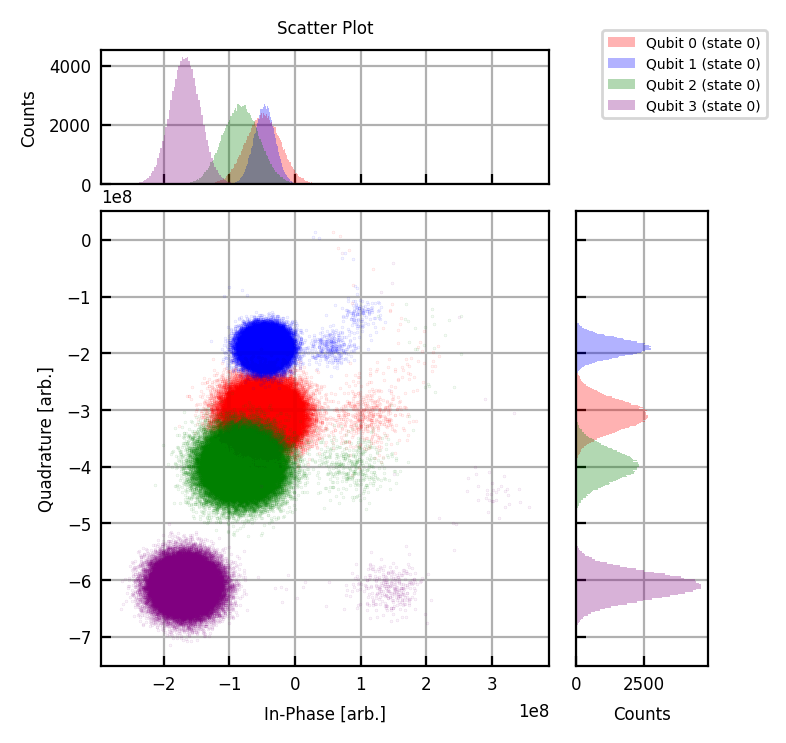

15:35:40 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


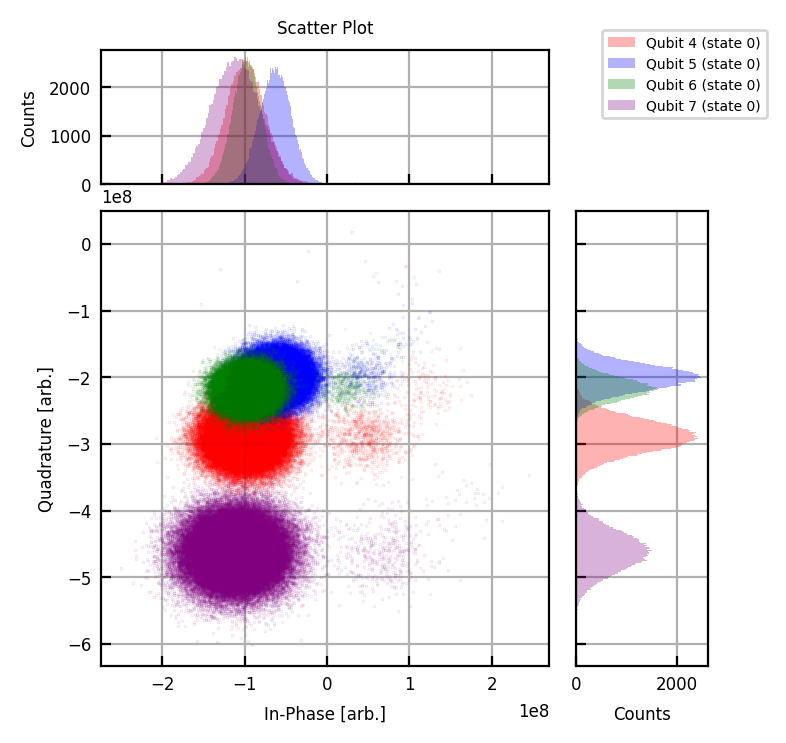

15:35:41 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


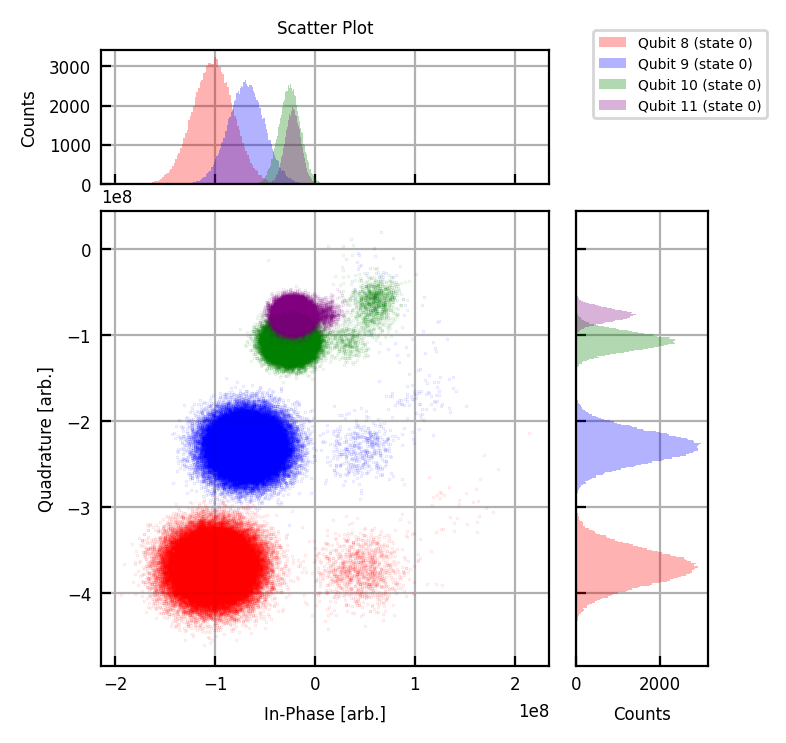

15:35:42 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


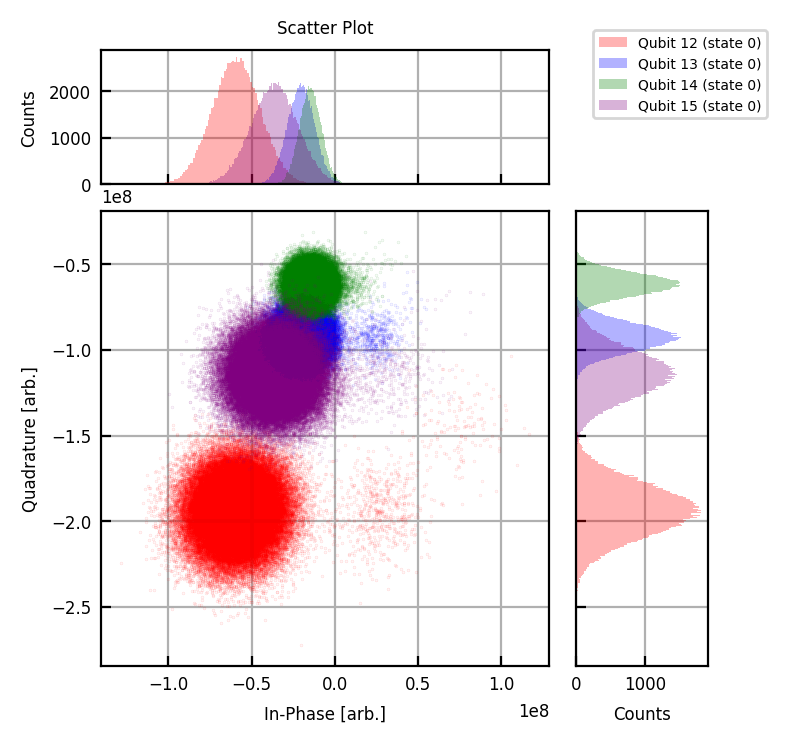

15:35:43 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


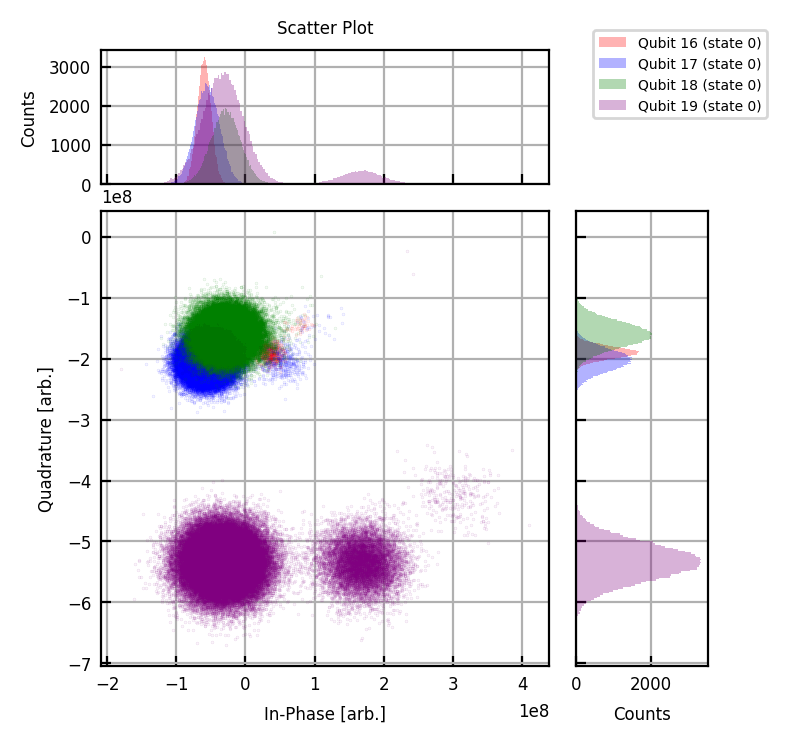

15:35:44 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


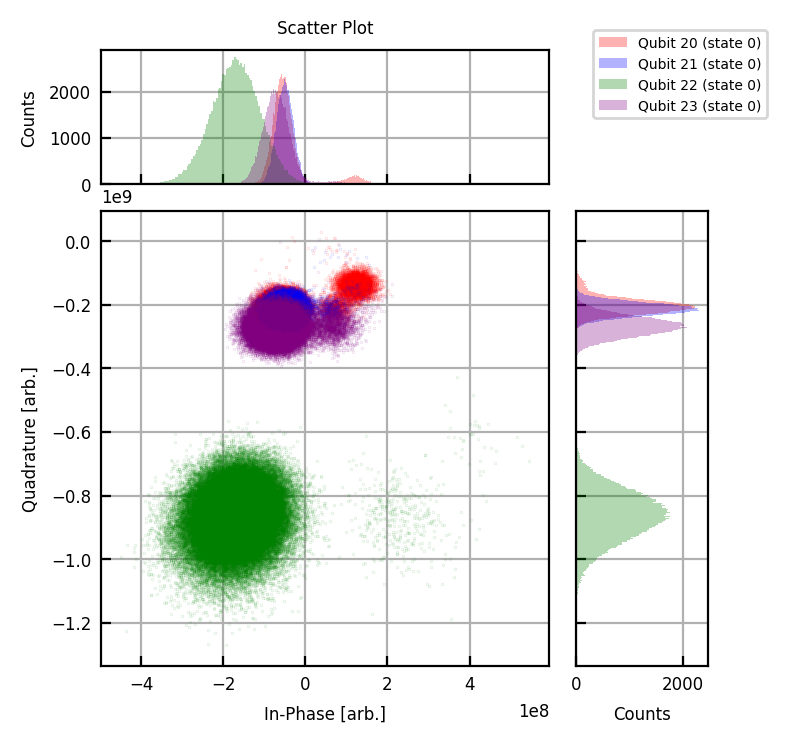

15:35:44 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


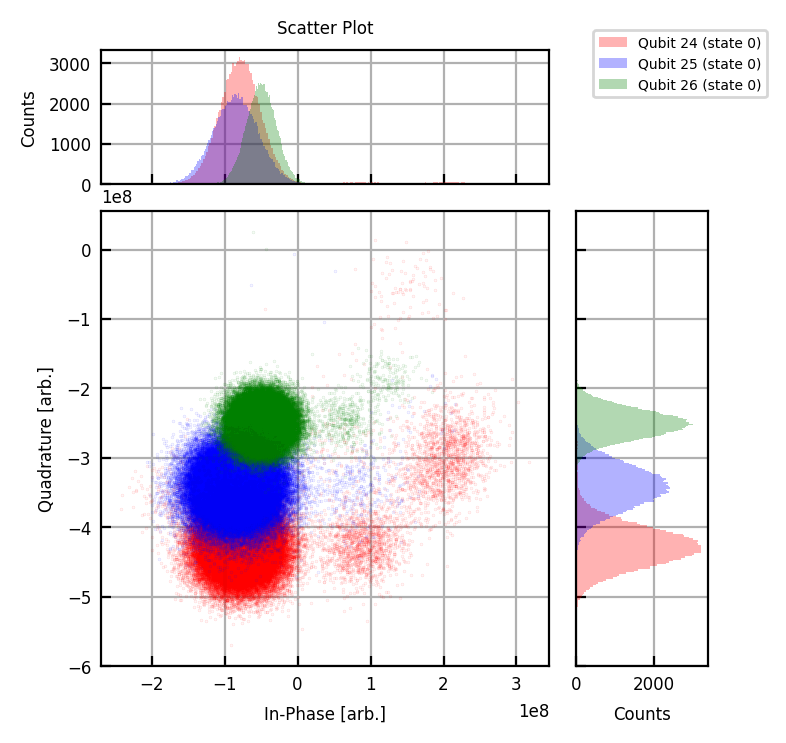

In [8]:
from soft_info import plot_multiple_IQ_data
import numpy as np

data = memories["mmr_0's"]  # Replace with your actual data
n_shots = int(1e5)
n_qubits = data.shape[1]  # Get the number of qubits

# Loop through the data in groups of 4 qubits at a time
for i in range(0, n_qubits, 4):
    upper_bound = min(i + 4, n_qubits)  # Make sure we don't go out of bounds
    data_subset = data[:n_shots, i:upper_bound]
    
    # Create legend labels for these qubits
    labels = [f'Qubit {i+j} (state 0)' for j in range(upper_bound - i)]
    
    plot_multiple_IQ_data([data_subset[:, j] for j in range(data_subset.shape[1])], legend_labels=labels)


15:35:45 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


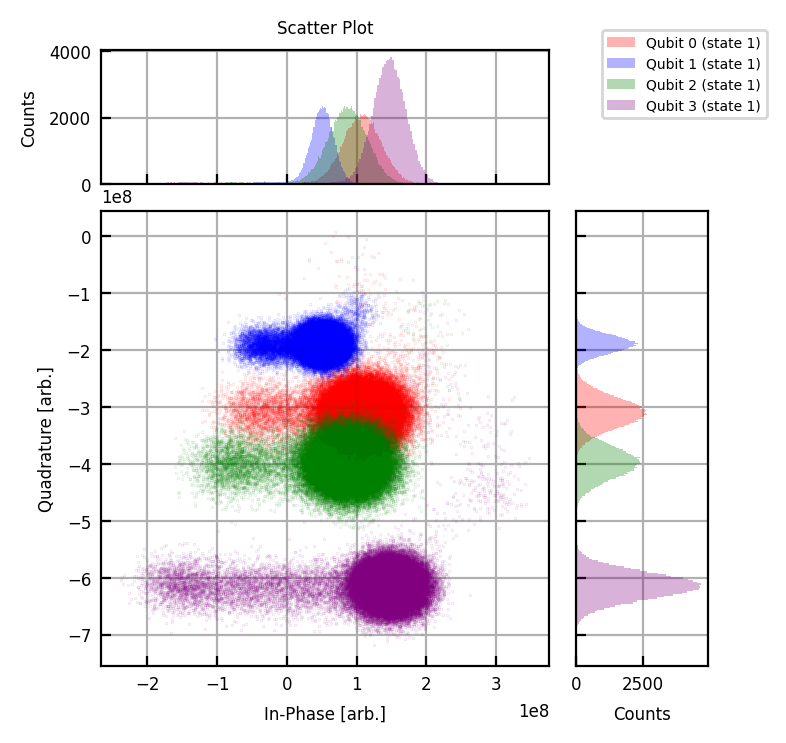

15:35:46 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


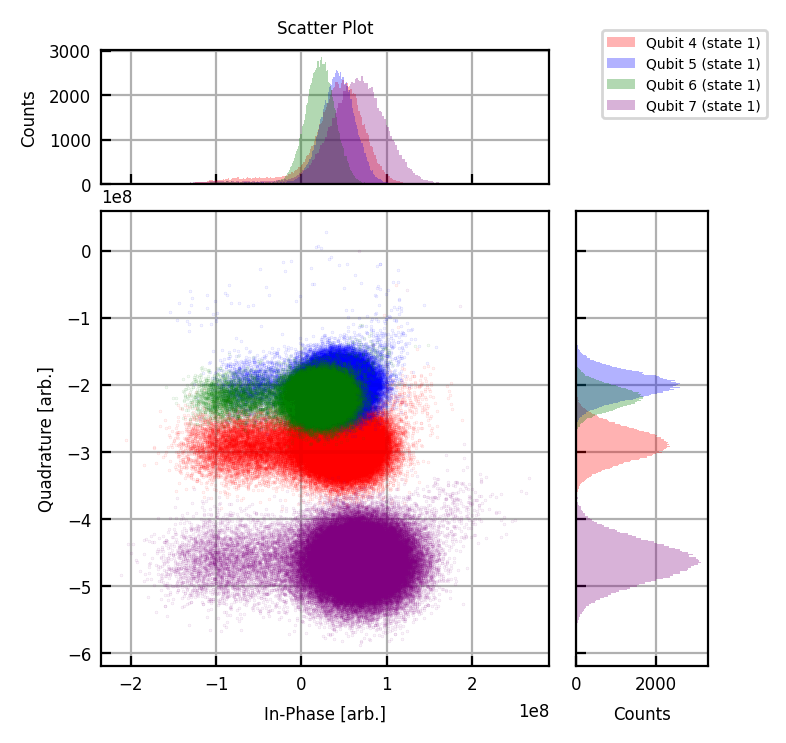

15:35:47 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


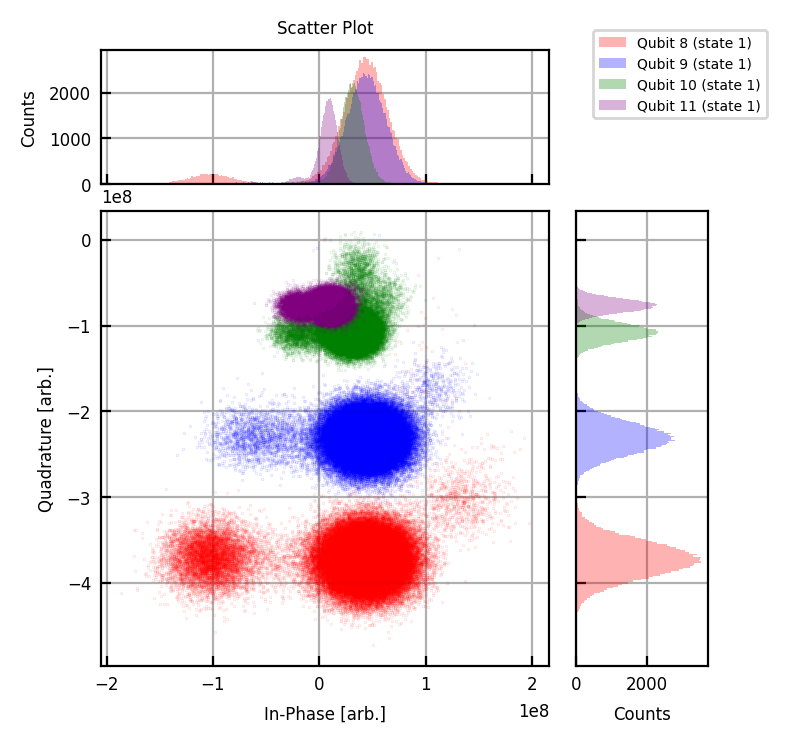

15:35:48 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


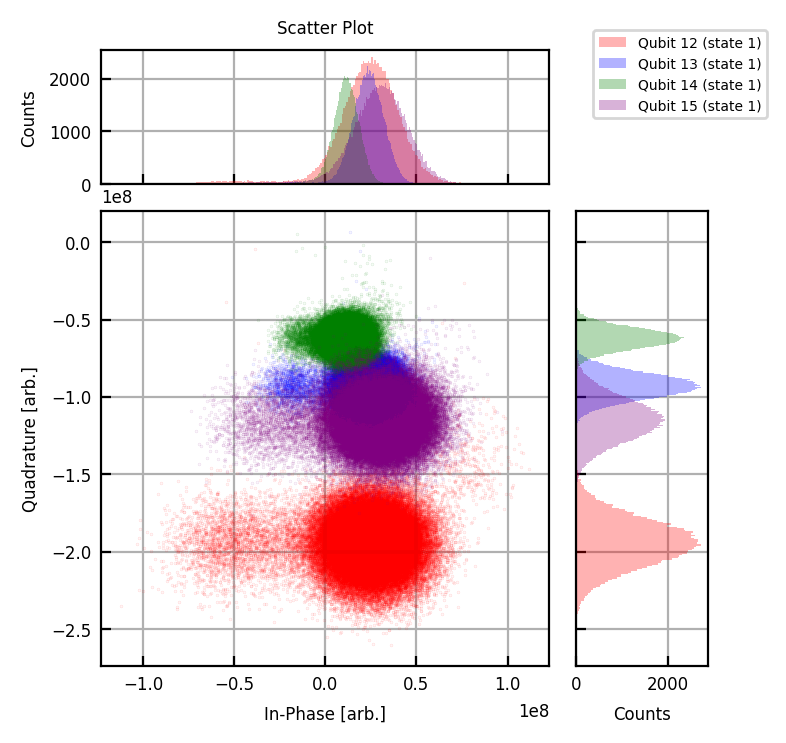

15:35:49 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


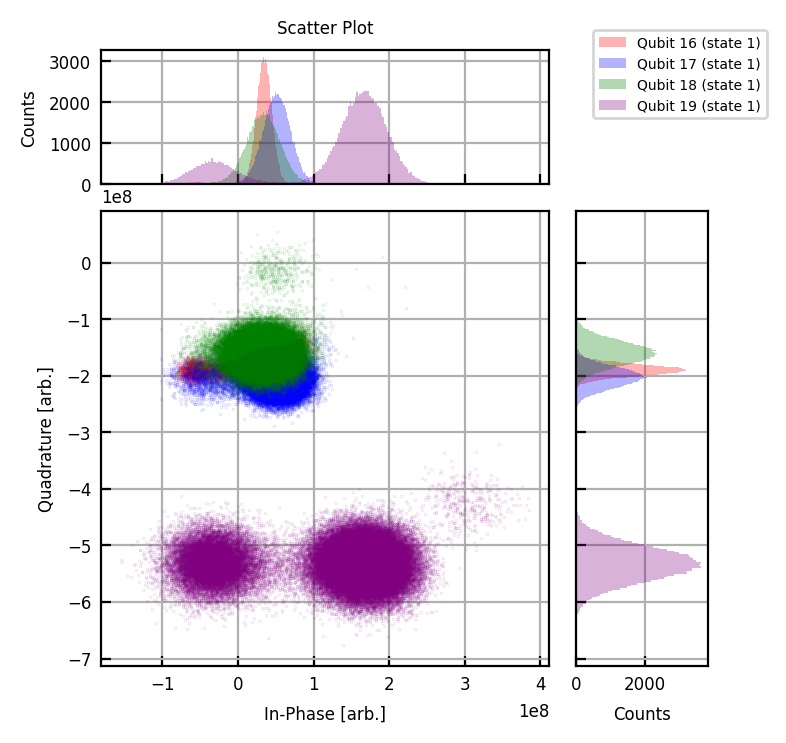

15:35:49 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


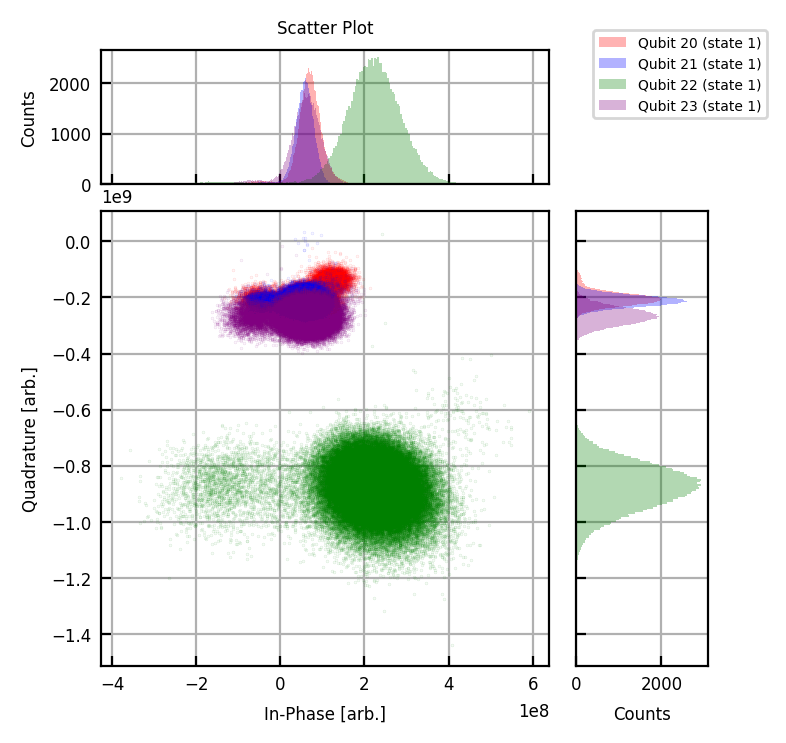

15:35:51 Warning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations. IN FILE: /Users/mha/My_Drive/Desktop/Studium/Physik/MSc/Semester_3/IBM/IBM_GIT/Soft-Info/src/soft_info/IQ_data/plotter.py, LINE: 144


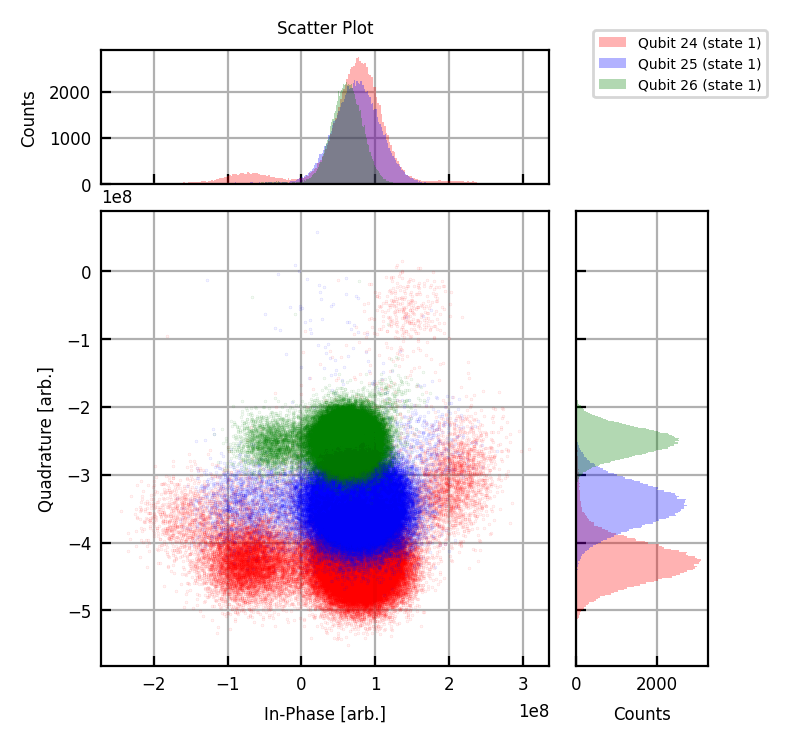

In [9]:
from soft_info import plot_multiple_IQ_data
import numpy as np

data = memories["mmr_1's"]  # Replace with your actual data
n_shots = int(1e5)
n_qubits = data.shape[1]  # Get the number of qubits

# Loop through the data in groups of 4 qubits at a time
for i in range(0, n_qubits, 4):
    upper_bound = min(i + 4, n_qubits)  # Make sure we don't go out of bounds
    data_subset = data[:n_shots, i:upper_bound]
    
    # Create legend labels for these qubits
    labels = [f'Qubit {i+j} (state 1)' for j in range(upper_bound - i)]
    
    plot_multiple_IQ_data([data_subset[:, j] for j in range(data_subset.shape[1])], legend_labels=labels)
